              Year         Rape  Kidnap_Abduct  Dowry_Deaths  Assault_Women  \
count   736.000000   736.000000     736.000000    736.000000     736.000000   
mean   2011.149457   727.855978    1134.542120    215.692935    1579.115489   
std       6.053453   977.024945    1993.536828    424.927334    2463.962518   
min    2001.000000     0.000000       0.000000      0.000000       0.000000   
25%    2006.000000    35.000000      24.750000      1.000000      34.000000   
50%    2011.000000   348.500000     290.000000     29.000000     387.500000   
75%    2016.000000  1069.000000    1216.000000    259.000000    2122.250000   
max    2021.000000  6337.000000   15381.000000   2524.000000   14853.000000   

       Assault_Minors  Domestic_Violence  Trafficking  Total_Crimes  
count      736.000000         736.000000   736.000000    736.000000  
mean       332.722826        2595.078804    28.744565   6613.752717  
std        806.024551        4042.004953    79.999660   9056.583832  
min     

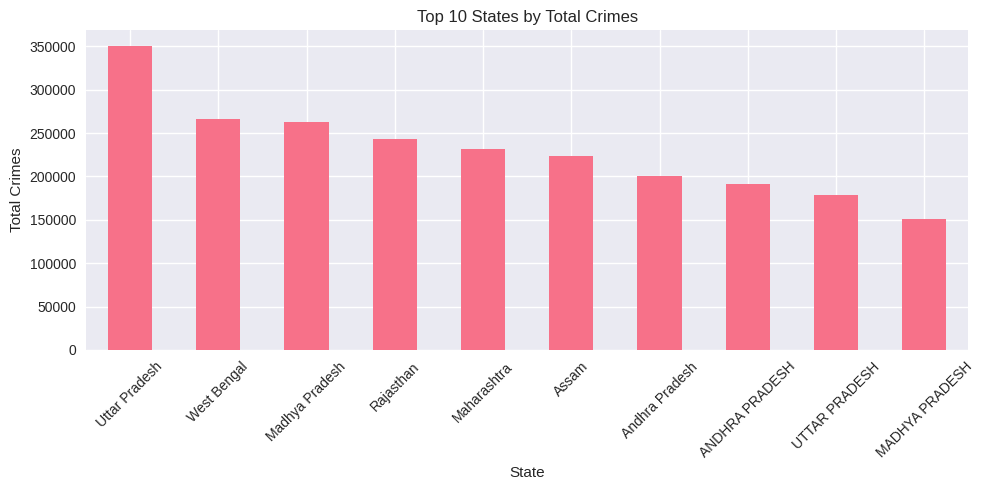

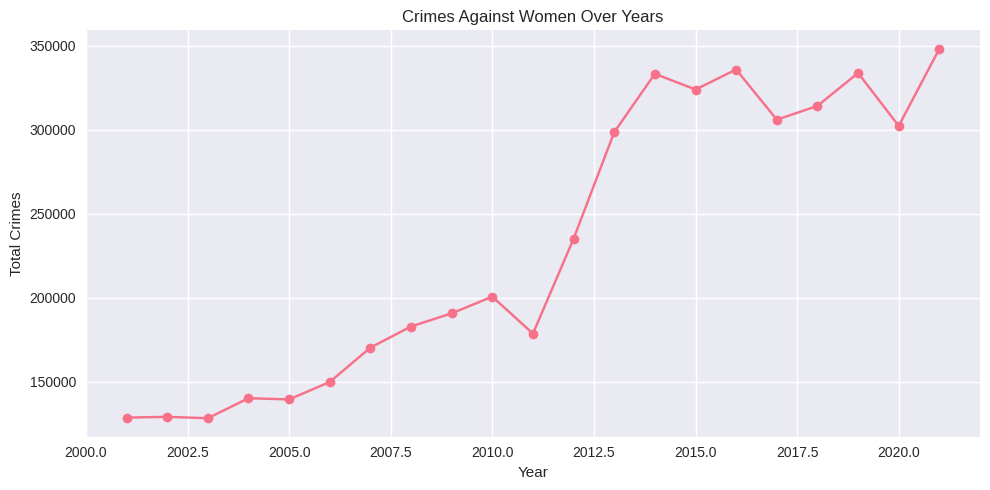

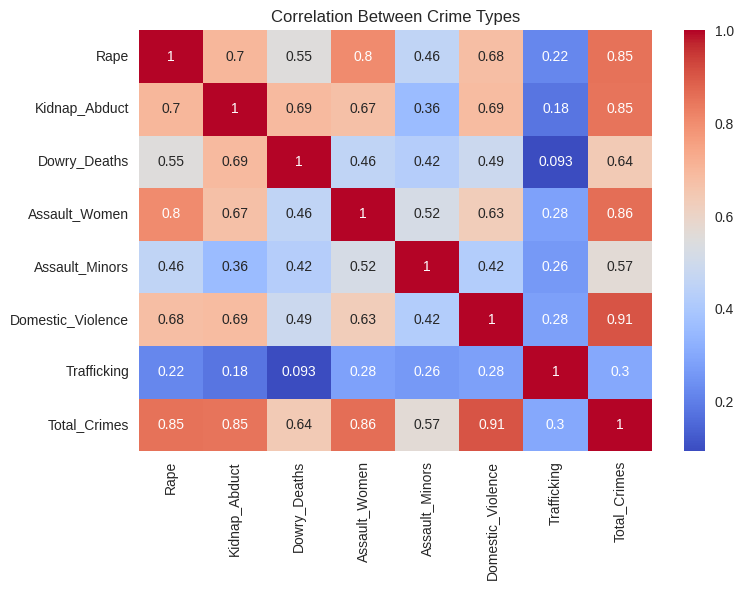

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update file path if needed)
df = pd.read_csv('/kaggle/input/data-analytics/CrimesOnWomenData.csv')

# Rename columns for clarity if needed
df.rename(columns={'K&A': 'Kidnap_Abduct', 'DD': 'Dowry_Deaths', 'AoW': 'Assault_Women',
                   'AoM': 'Assault_Minors', 'DV': 'Domestic_Violence', 'WT': 'Trafficking'}, inplace=True)

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing values
df.fillna(0, inplace=True)

# Feature engineering: Total crimes
crime_cols = ['Rape', 'Kidnap_Abduct', 'Dowry_Deaths', 'Assault_Women', 
              'Assault_Minors', 'Domestic_Violence', 'Trafficking']
df['Total_Crimes'] = df[crime_cols].sum(axis=1)

# Summary statistics
print(df.describe())

# Visualization 1: Top 10 states by total crimes
top_states = df.groupby('State')['Total_Crimes'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', figsize=(10,5), title='Top 10 States by Total Crimes')
plt.ylabel('Total Crimes'); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# Visualization 2: Trend of total crimes by year
yearly_trend = df.groupby('Year')['Total_Crimes'].sum()
yearly_trend.plot(marker='o', figsize=(10,5), title='Crimes Against Women Over Years')
plt.ylabel('Total Crimes'); plt.grid(True); plt.tight_layout(); plt.show()

# Visualization 3: Heatmap of crime correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[crime_cols + ['Total_Crimes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Crime Types')
plt.tight_layout()
plt.show()



